<a href="https://colab.research.google.com/github/amir-jafari/SOM/blob/main/examples/Tabular/Iris/notebook/iris_generic_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this demo, we will show how to use a generic plot function in NNSOM.

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    # Install NNSOM
    !pip install --upgrade NNSOM==1.4.2   # There'a a trounble in pypi. And generic function only work for version 1.4.2 right now.

In [2]:
from NNSOM.plots import SOMPlots
from NNSOM.utils import *

## Set Up the parameters used for NNSOM

In [3]:
# SOM Parameters
SOM_Row_Num = 4  # The number of row used for the SOM grid.
Dimensions = (SOM_Row_Num, SOM_Row_Num) # The dimensions of the SOM grid.

# Training Parameters
Epochs = 500
Steps = 100
Init_neighborhood = 3

# Random State
from numpy.random import default_rng
SEED = 1234567
rng = default_rng(SEED)

In [4]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
X = iris.data
y = iris.target

# Preprocessing data
X = X[rng.permutation(len(X))]
y = y[rng.permutation(len(X))]

scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)
X_scaled = np.transpose(X_scaled)

## Training SOM

We will use SOMPlots which is child class of SOM because we want to plot SOM.

In [6]:
som = SOMPlots(Dimensions)
som.init_w(X_scaled)
som.train(X_scaled, Init_neighborhood, Epochs, Steps)

Beginning Initialization
Current Time = 16:11:38
Ending Initialization
Current Time = 16:11:38
Beginning Training
Current Time = 16:11:38
50
Current Time = 16:11:38
100
Current Time = 16:11:38
150
Current Time = 16:11:39
200
Current Time = 16:11:39
250
Current Time = 16:11:39
300
Current Time = 16:11:39
350
Current Time = 16:11:39
400
Current Time = 16:11:39
450
Current Time = 16:11:39
500
Current Time = 16:11:39
Ending Training
Current Time = 16:11:39


## Extract SOM Cluster Details

After training the SOM, information on which clusters the training data were classified into can be obtained. This can be used to visualize various additional variables on the topology of the SOM.

**clust**: sequence of vectors with indices of input data that are in each cluster sorted by distance from cluster center.

dist: sequence of vectors with distance of input data that are in each cluster sorted by distance fro cluster center.

mdist: 1d array with maximum distance in each cluster

clustSize: 1d array with number of items in each cluster

In [8]:
clust, dist, mdist, clustSize = extract_cluster_details(som, X_scaled)

# Visualize the SOM with the generic plot function

Generic Plot Function:

- Parameters:
  - plot_type (str): the type of plot to be generated.
  - data_dict (dict): a dictionary containing the data to be plotted.

    The key of the dictionary is predefined:
      - "original_data": the raw data trained
      - "input_data": the original data scaled from -1 to 1
      - "target": the target class of orinal data
      - "clust": the sequence of vector with indices
      - "cat_1darray": the additional 1d-array with categorical feature
      - "cat_2darray": the additional 2d-array with categorical feature
      - "num_1darray": the additional 1d-array with numerical feature

  - ind (int, tuple, or list): the index (indices) to be plotted on original data
  - target_class (int): the target class to be plotted on target or cat_1darray
  - use_add_1darray (bool): if true, the additional 1-d array to be used
  - use_add_2darray (bool): if true, the additional 2-d array to be used
  - **kwargs (dict): Additional argument to be passed to the interactive plot function


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Plots that do not require an Argument

These types of plots do not require an addtional variable, so you can output a plot simply by entering the plot_type.

topology, topology with number, neuron connection, neuron distance and wgts

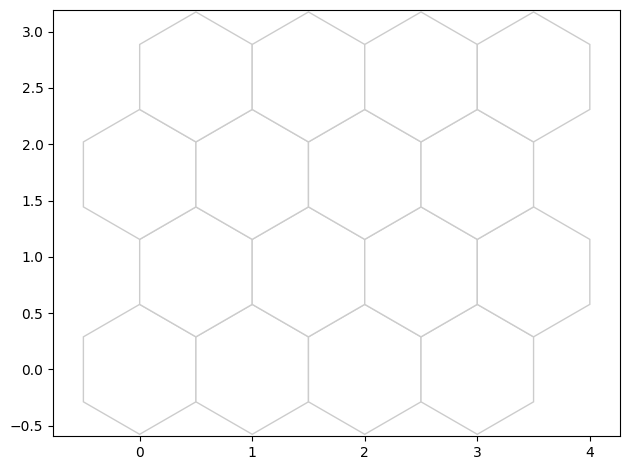

In [10]:
fig, ax, pathces = som.plot("top")
plt.show()

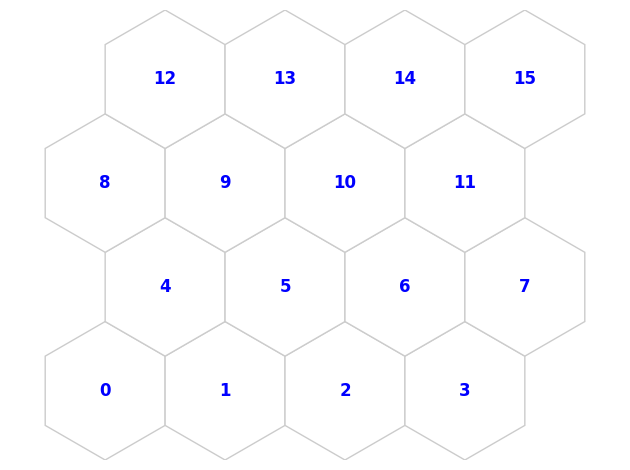

In [11]:
fig, ax, patches, text = som.plot('top_num')
plt.show()

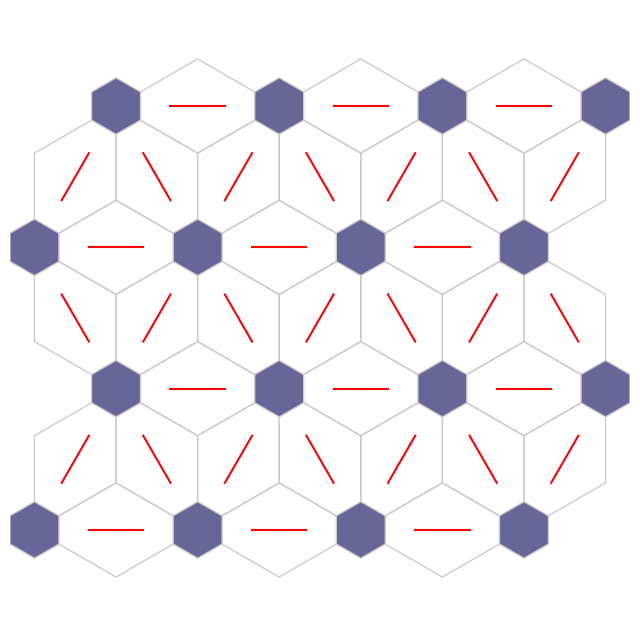

In [12]:
fig, ax, patches = som.plot('neuron_connection')
plt.show()

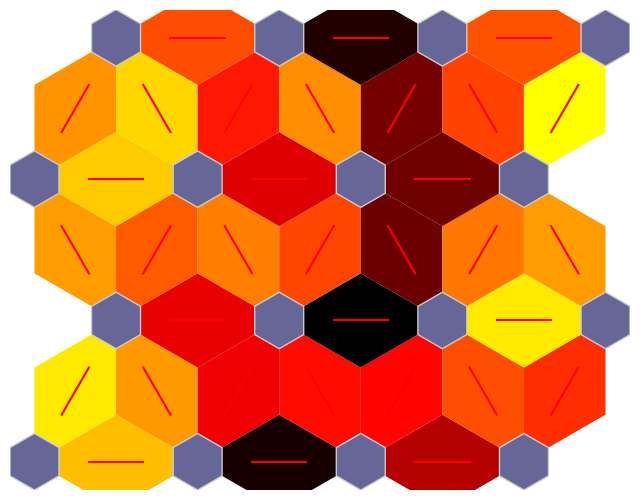

In [14]:
fig, ax, patches = som.plot('neuron_dist')
plt.show()

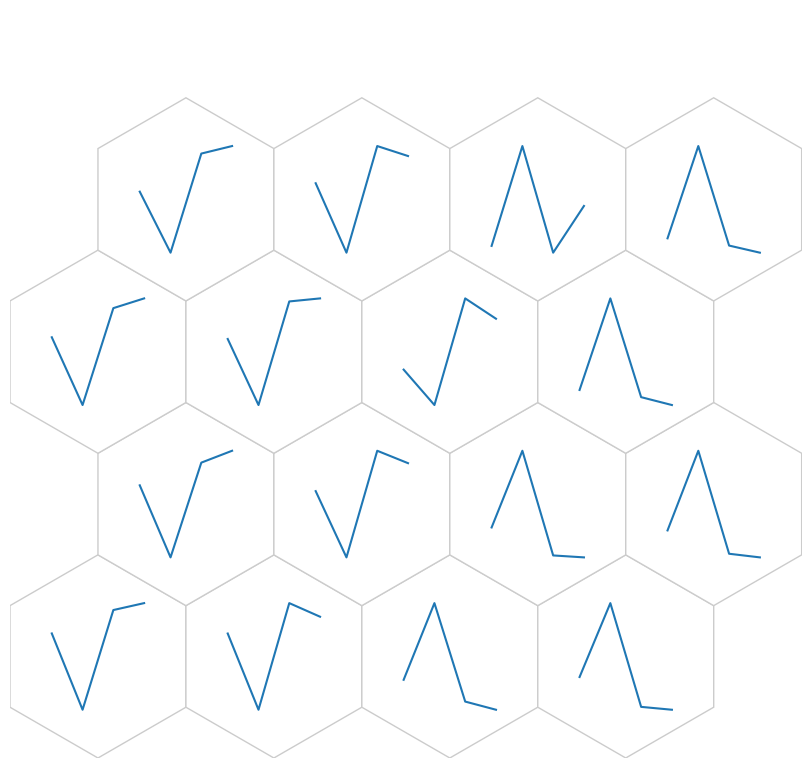

In [15]:
fig, ax, h_axes = som.plot('wgts')
plt.show()

## 2. Plots requiring Additional Variable

These plots require an additional variable, so a data_dict must be created. However, once this is created, it can be used for other plots.

### Data Preparation

In [41]:
data_dict ={
    "original_data": X, # iris.data shuffled with the specific random state
    'input_data': X_scaled, # iris.data scaled from -1 to 1
    "target": y,  # iris.target shuffled with the specific random state
    "clust": clust, # sequence of vectors with indices. This clust is corresponding to original data
    "cat_1darray": None,
    "cat_2darray": None,
    "num_1darray": None
}

### 2.1 Hit Histogram Family

#### Hit Histogram:

This plot requires to have the scaled input data ("input_data") in the data_dict.

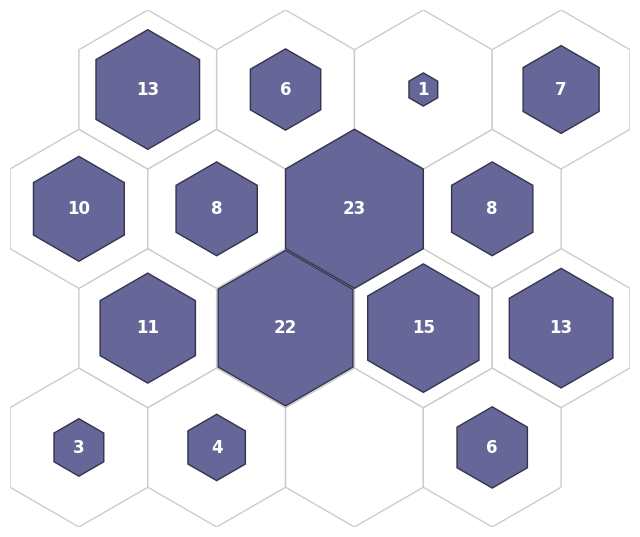

In [19]:
# Hit histogram
fig, ax, patches, text = som.plot('hit_hist', data_dict)
plt.show()

#### Gray Histogram:

This plot requires to have the scaled input data.


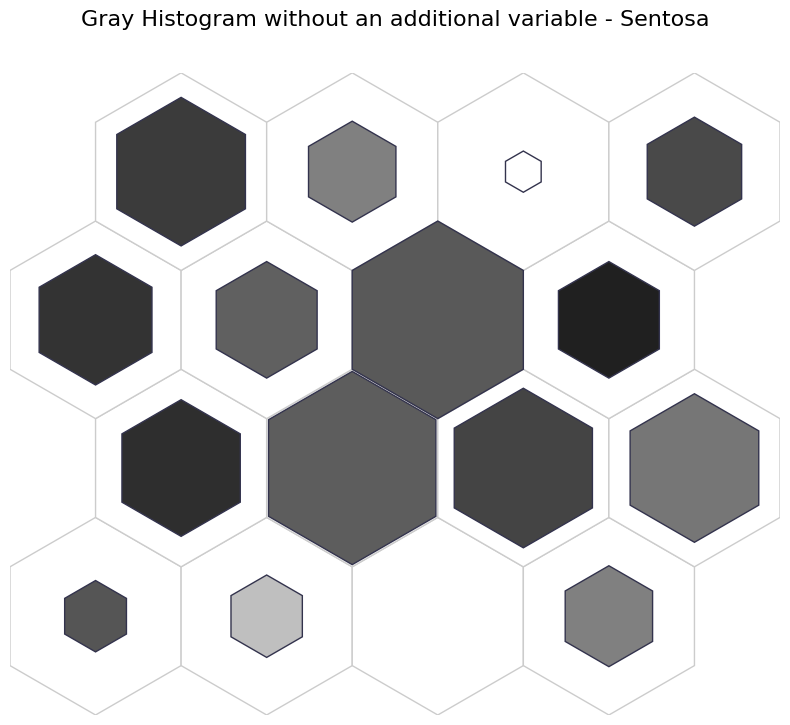

In [51]:
# Gray Hist without using additional categorical 1-d array.
fig, ax, patches, text = som.plot('gray_hist', data_dict, target_class=0)
plt.suptitle("Gray Histogram without an additional variable - Sentosa", fontsize=16)
plt.show()

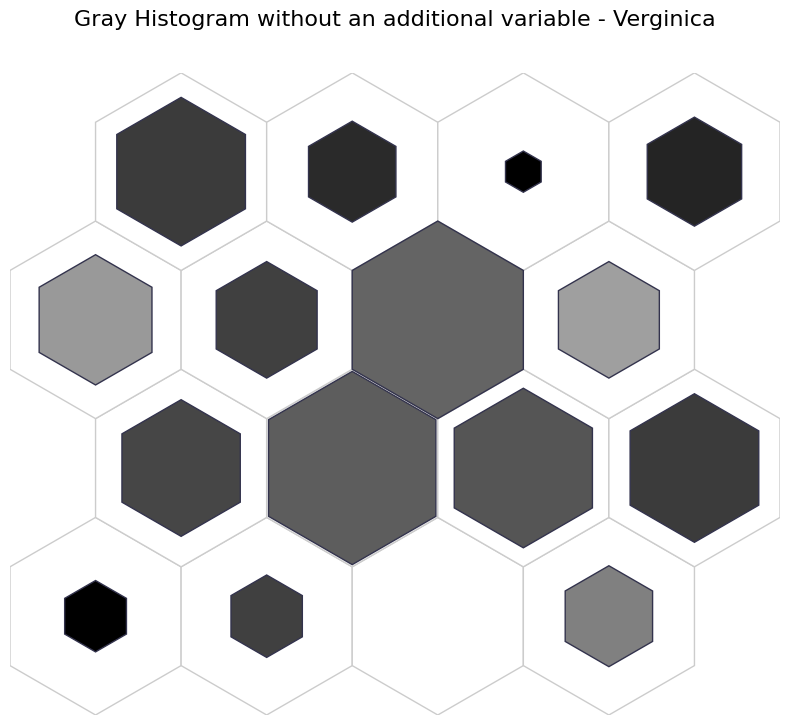

In [52]:
fig, ax, patches, text = som.plot('gray_hist', data_dict, target_class=1)
plt.suptitle("Gray Histogram without an additional variable - Verginica", fontsize=16)
plt.show()

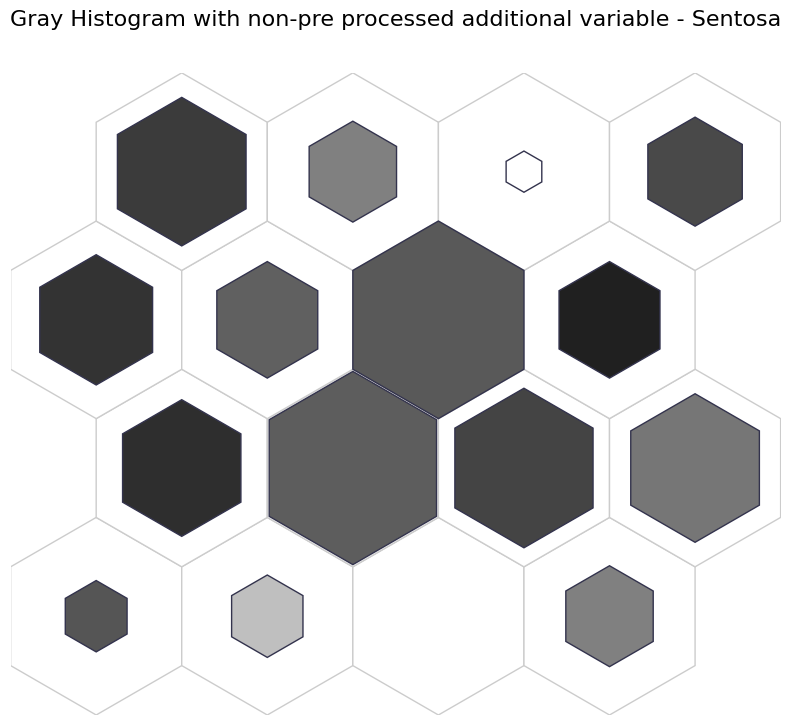

In [49]:
# If the len(cat_1darray) == len(original_data),
# the class percentage is calculated and pass.
# In this case, the user requied to provide target_class where the user want to check.
data_dict['cat_1darray'] = y
fig, ax, patches, text = som.plot('gray_hist', data_dict, target_class=0, use_add_1darray=True)
plt.suptitle("Gray Histogram with non-pre processed additional variable - Sentosa", fontsize=16)
plt.show()

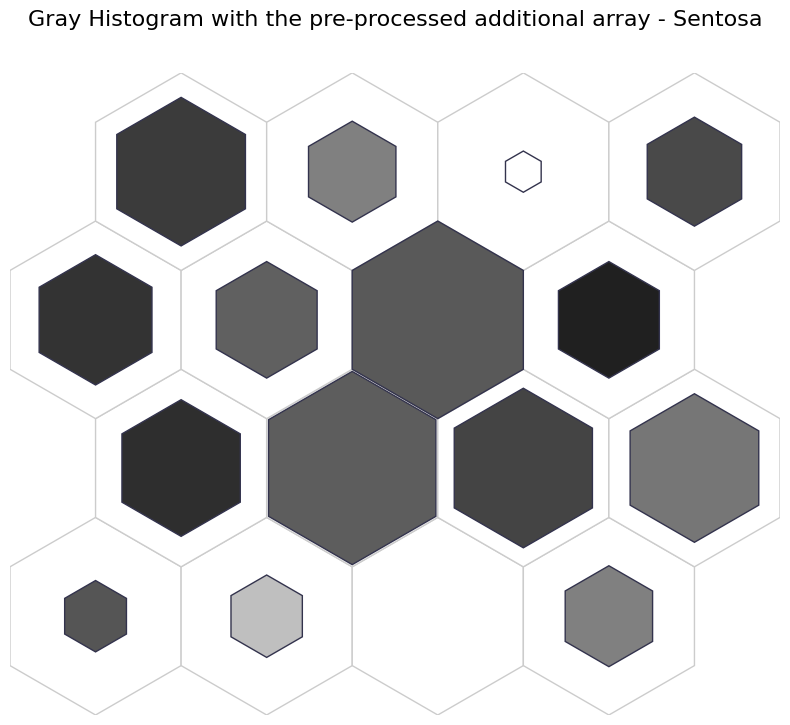

In [48]:
# If the len(cat_1darray) == numNeurons,
# the 1-d array is passes the plot directory without specifying target_class
sent_perc = get_perc_cluster(y, 0, clust)
data_dict['cat_1darray'] = sent_perc
fig, ax, patches, text = som.plot('gray_hist', data_dict, use_add_1darray=True)
plt.suptitle("Gray Histogram with the pre-processed additional array - Sentosa", fontsize=16)
plt.show()

#### Color Histogram

This plot requires to have the scaled input data.

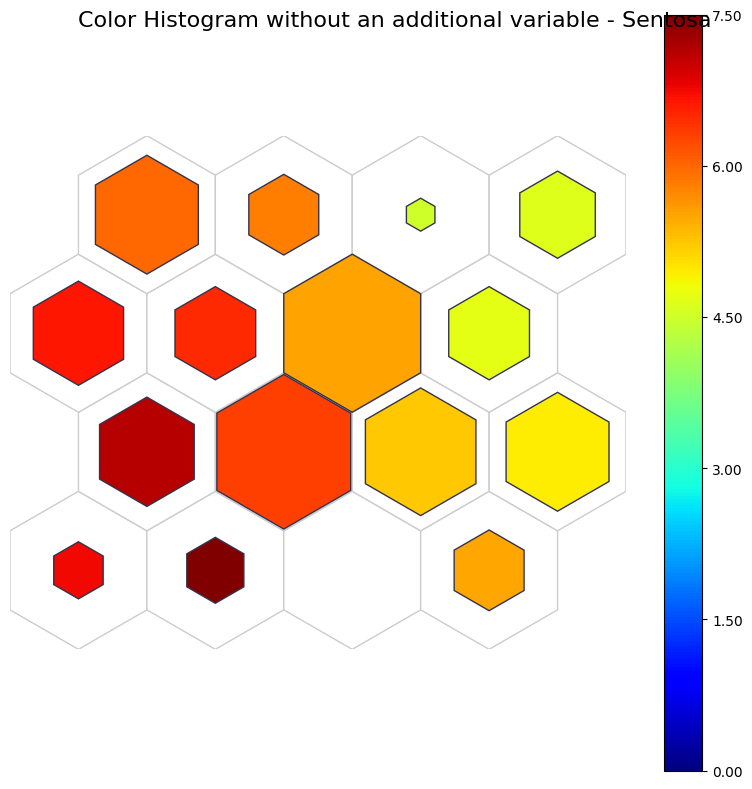

In [62]:
fig, ax, patches, text, cbar = som.plot('color_hist', data_dict, ind=0)
plt.suptitle("Color Histogram without an additional variable - Sentosa", fontsize=16)
plt.show()

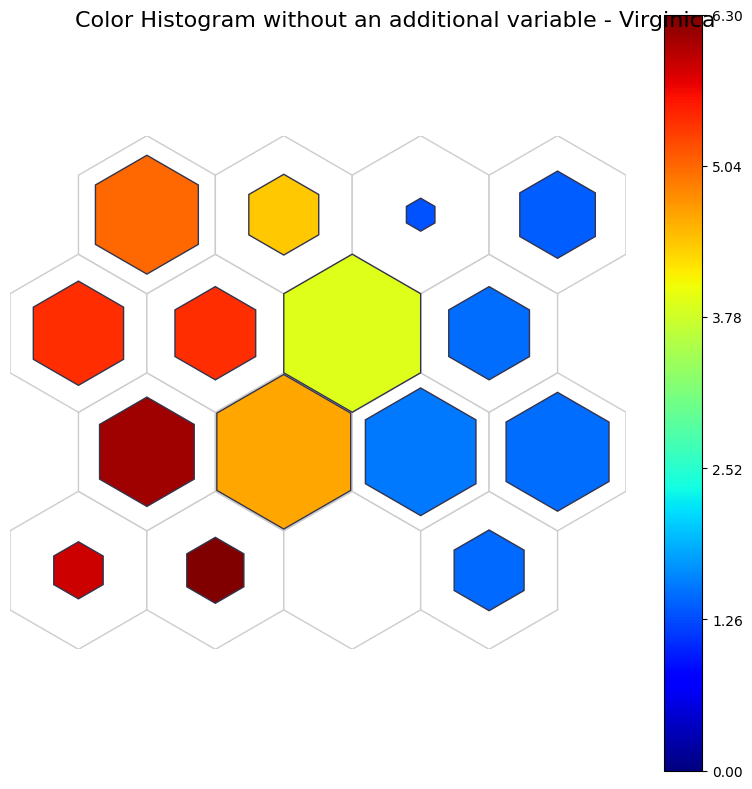

In [56]:
fig, ax, patches, text, cbar = som.plot('color_hist', data_dict, ind=2)
plt.suptitle("Color Histogram without an additional variable - Virginica", fontsize=16)
plt.show()

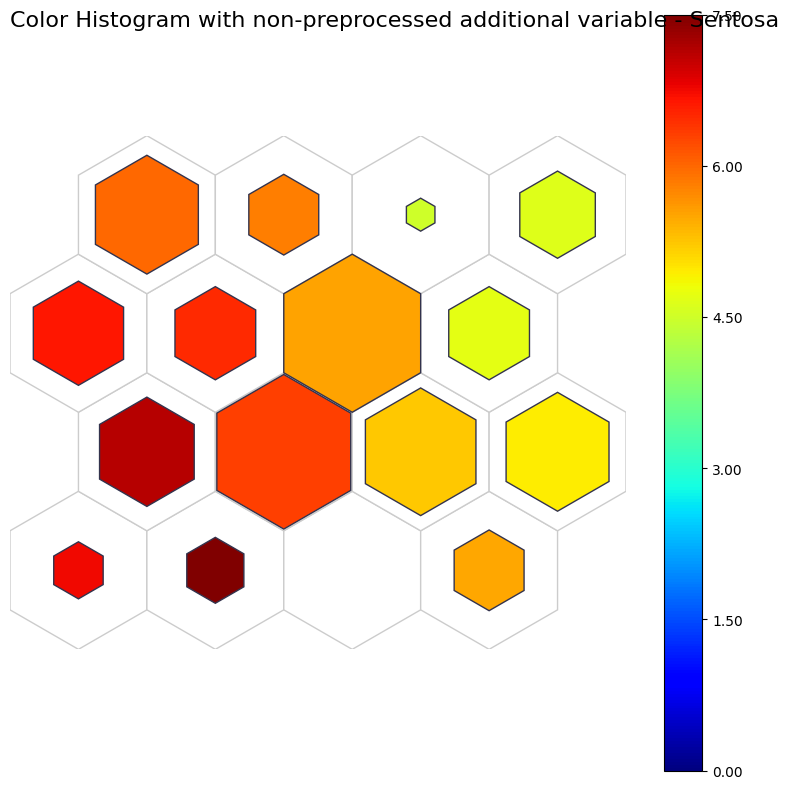

In [61]:
data_dict['num_1darray'] = X[:, 0]

fig, ax, patches, text, cbar = som.plot('color_hist', data_dict, use_add_1darray=True)
plt.suptitle("Color Histogram with non-preprocessed additional variable - Sentosa", fontsize=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/NNSOM/plots.py:344: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ticktext)


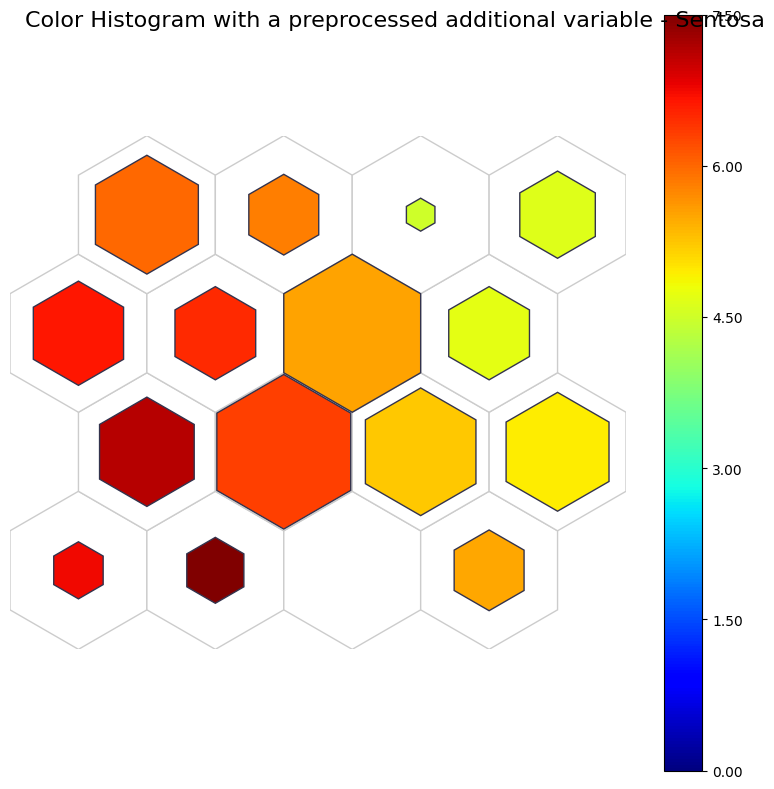

In [60]:
data_dict['num_1darray'] = get_cluster_avg(X[:, 0], clust)

fig, ax, patches, text, cbar = som.plot('color_hist', data_dict, use_add_1darray=True)
plt.suptitle("Color Histogram with a preprocessed additional variable - Sentosa", fontsize=16)
plt.show()

#### Complex Hit Histogram


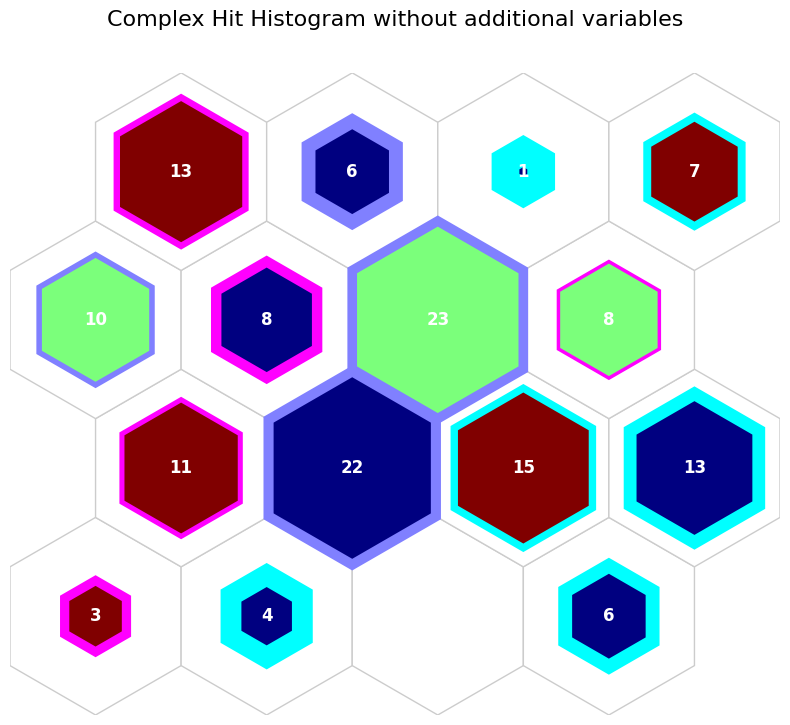

In [66]:
fig, ax, patches, text = som.plot("complex_hist", data_dict, target_class=0)
plt.suptitle("Complex Hit Histogram without additional variables", fontsize=16)
plt.show()

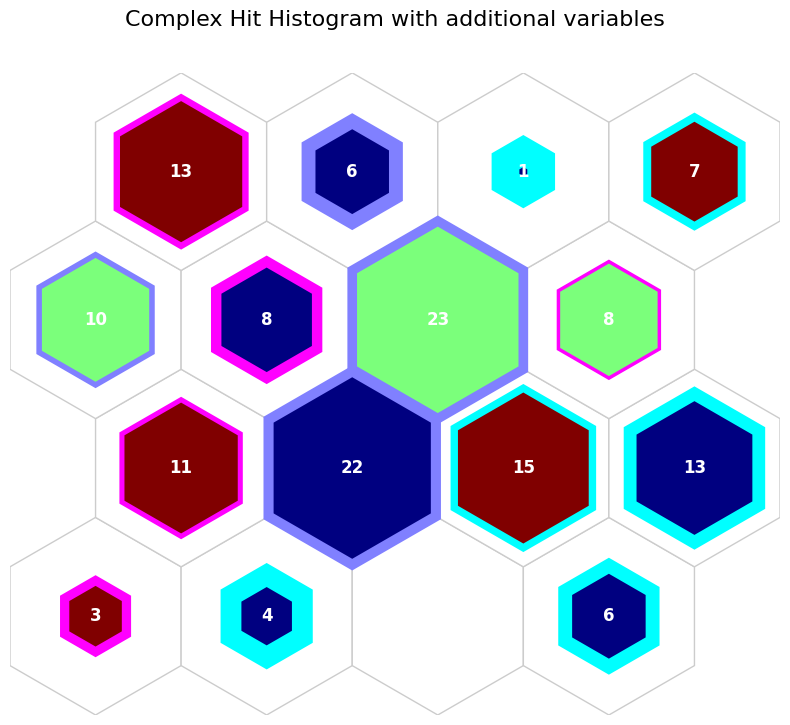

In [69]:
face_labels = majority_class_cluster(y, clust)
edge_labels = closest_class_cluster(y, clust)
edge_width = get_edge_widths(np.where(y == 0)[0], clust)
data_dict['cat_2darray'] = np.transpose(np.array([face_labels, edge_labels, edge_width]))

fig, ax, patches, text = som.plot("complex_hist", data_dict, use_add_2darray=True)
plt.suptitle("Complex Hit Histogram with additional variables", fontsize=16)
plt.show()

#### Simple Grid

/usr/local/lib/python3.10/dist-packages/NNSOM/plots.py:781: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ticktext)


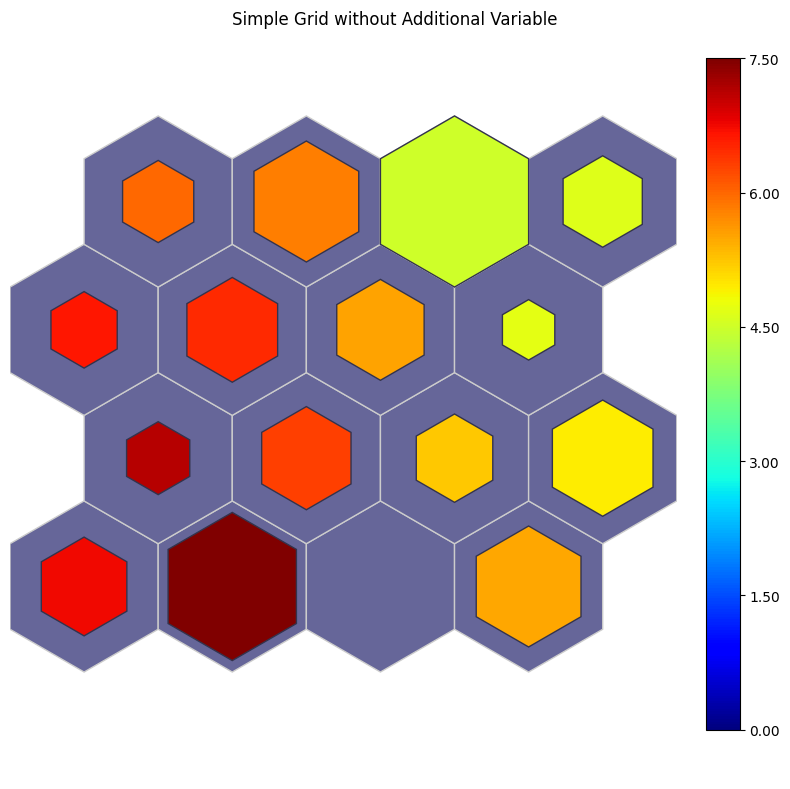

In [70]:
fig, ax, patches, cbar = som.plot('simple_grid', data_dict, ind=0, target_class=0)
plt.suptitle("Simple Grid without Additional Variable")
plt.show()

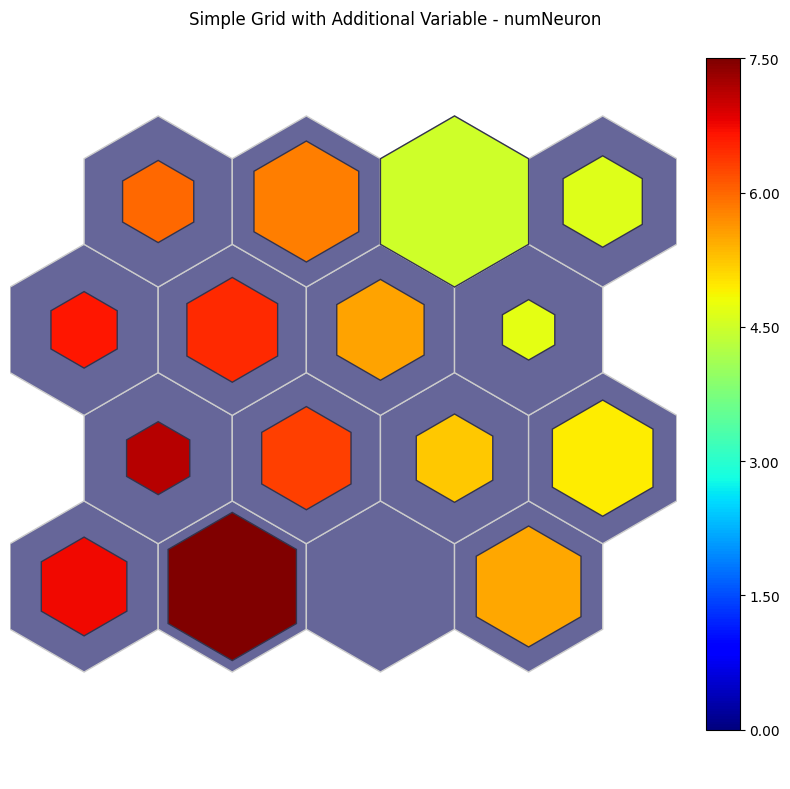

In [71]:
# num_feature: len(num_1darray) == numNeurons
data_dict['cat_1darray'] = sent_perc
# cut_feature: len(cat_1darray) == numNeurons
data_dict['num_1darray'] = get_cluster_avg(X[:, 0], clust)

fig, ax, patches, cbar = som.plot('simple_grid', data_dict, ind=0, target_class=0, use_add_1darray=True)
plt.suptitle("Simple Grid with Additional Variable - numNeuron")
plt.show()

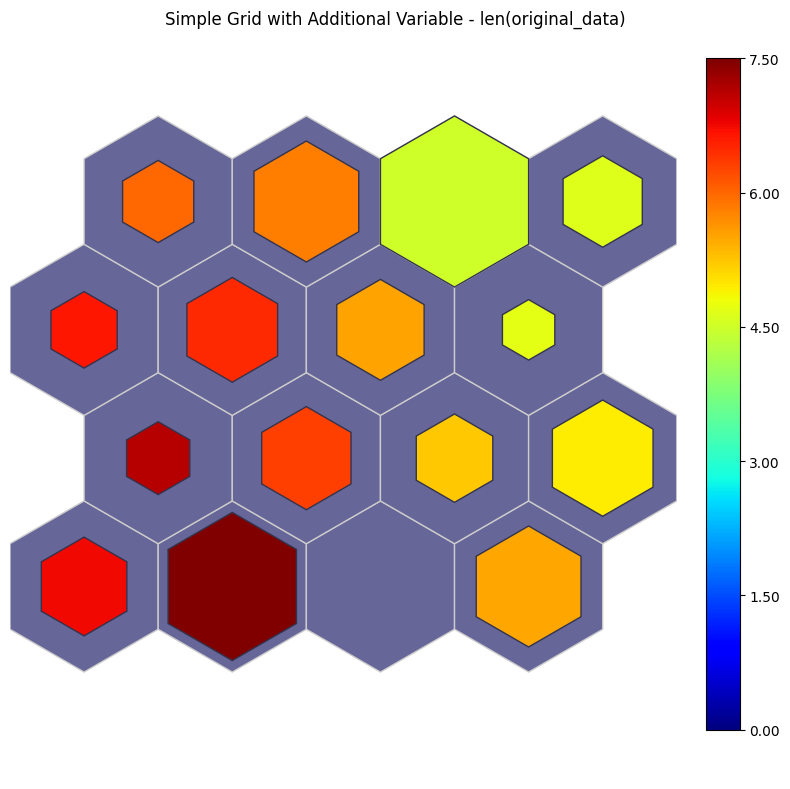

In [72]:
# num_feature: len(num_1darray) == len(original_data)
data_dict['num_1darray'] = X[:, 0]
# cut_feature: len(cat_1darray) == len(original_data)
data_dict['cat_1darray'] = y
fig, ax, patches, cbar = som.plot('simple_grid', data_dict,target_class=0, use_add_1darray=True)
plt.suptitle("Simple Grid with Additional Variable - len(original_data)")
plt.show()

### 2.2 Basic Plot Family

#### Pie Chart

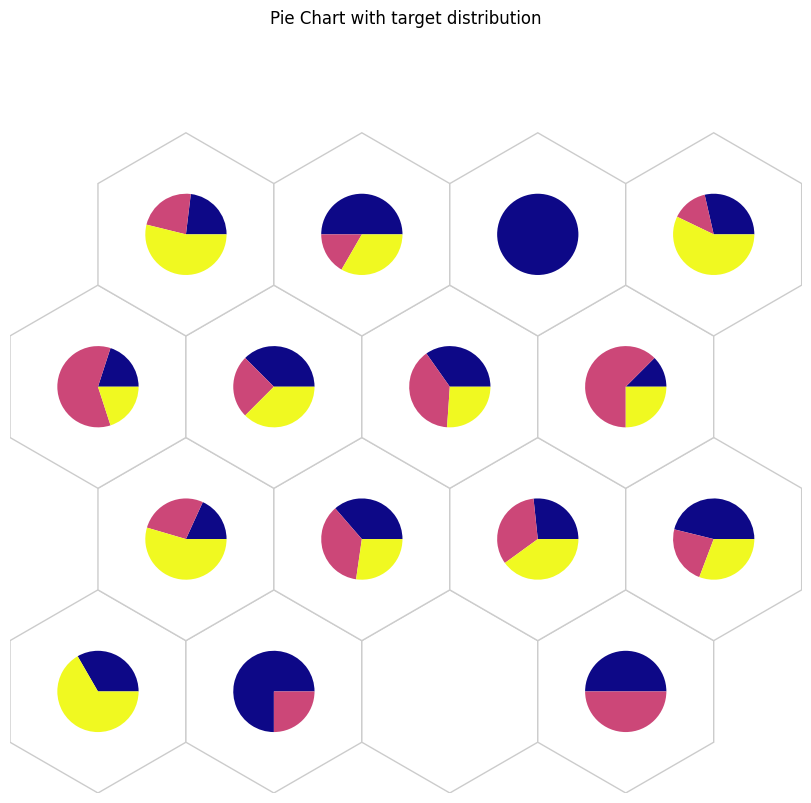

In [79]:
fig, ax, h_axes = som.plot('pie', data_dict)
plt.suptitle("Pie Chart with target distribution")
plt.show()

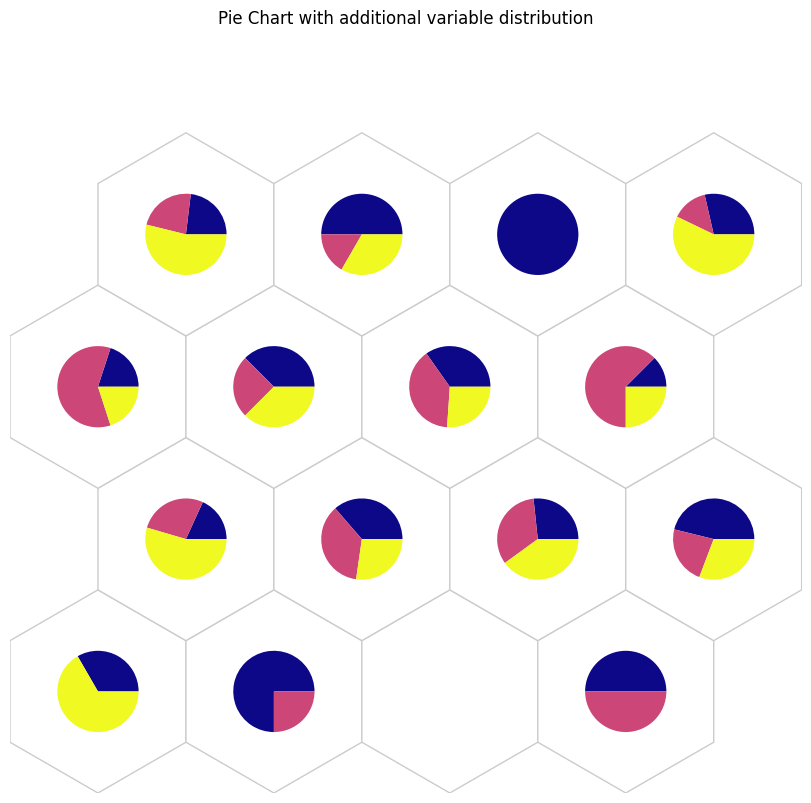

In [82]:
data_dict['cat_2darray'] = count_classes_in_cluster(y, clust)
fig, ax, h_axes = som.plot('pie', data_dict, use_add_2darray=True)
plt.suptitle("Pie Chart with additional variable distribution")
plt.show()

#### Stem Plot

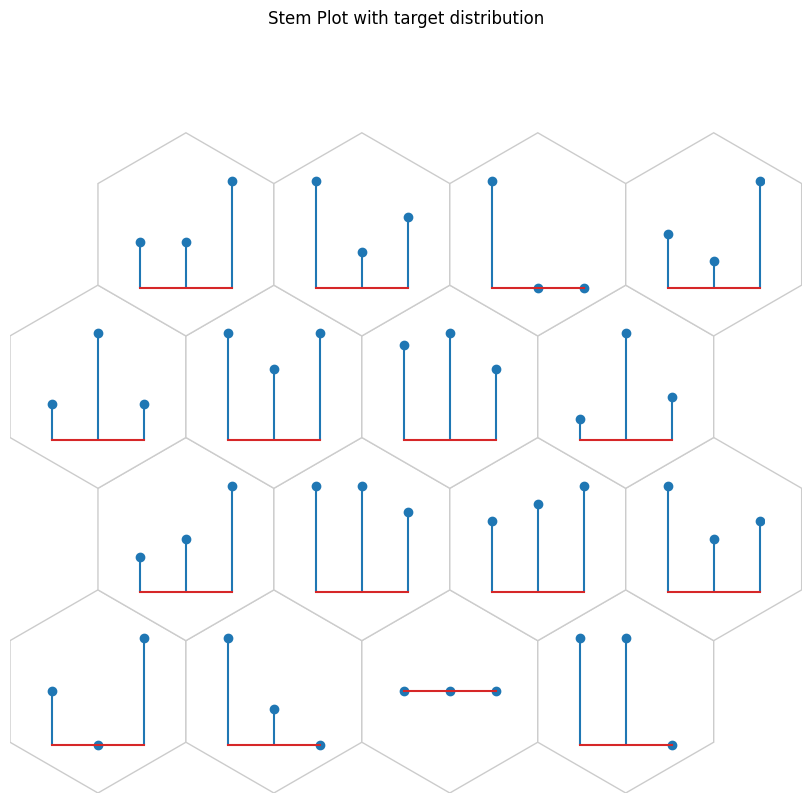

In [83]:
fig, ax, h_axes = som.plot('stem', data_dict)
plt.suptitle("Stem Plot with target distribution")
plt.show()

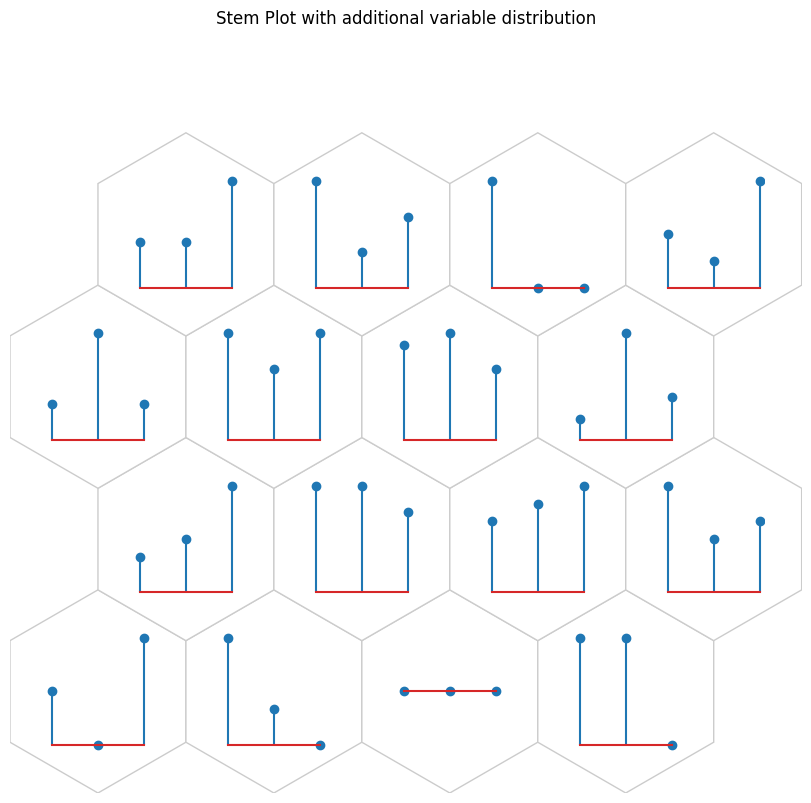

In [87]:
fig, ax, h_axes = som.plot('stem', data_dict, use_add_2darray=True)
plt.suptitle("Stem Plot with additional variable distribution")
plt.show()

#### Hisogram

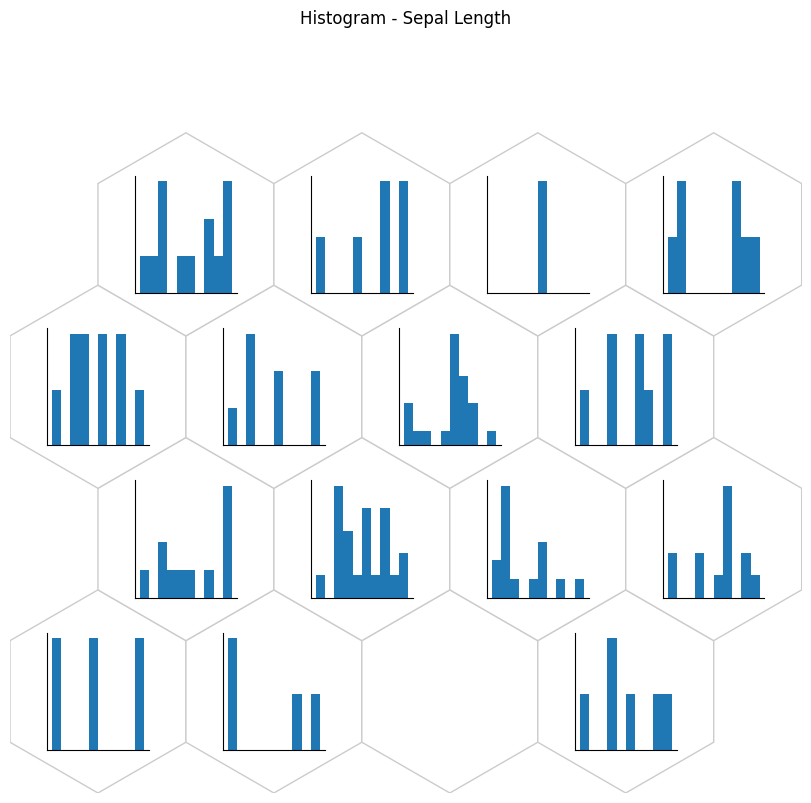

In [94]:
fig, ax, h_axes = som.plot('hist', data_dict, ind=0)
plt.suptitle("Histogram - Sepal Length")
plt.show()

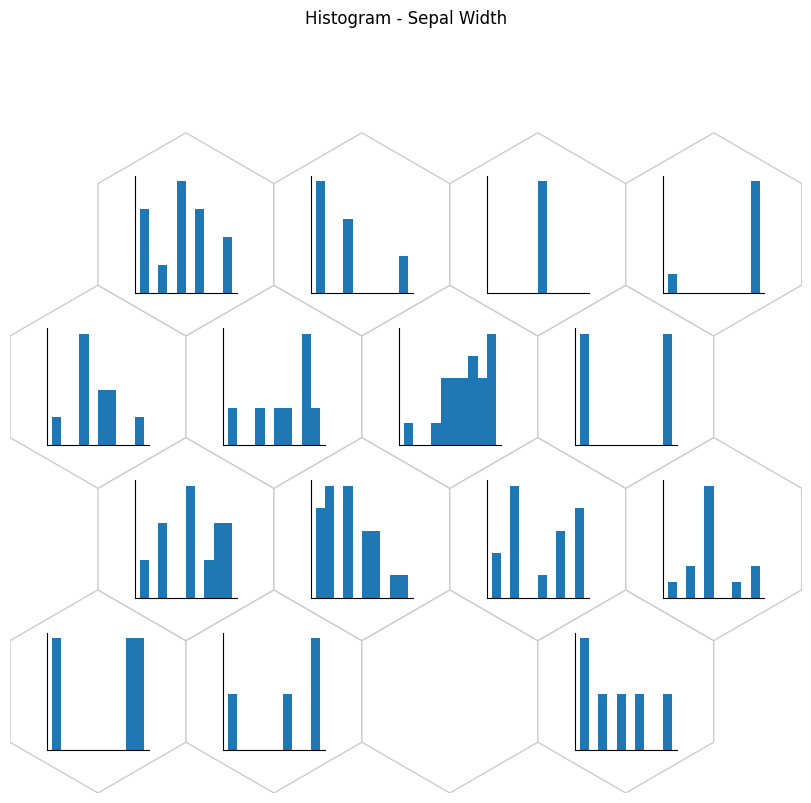

In [95]:
fig, ax, h_axes = som.plot('hist', data_dict, ind=1)
plt.suptitle("Histogram - Sepal Width")
plt.show()

#### Box Plot

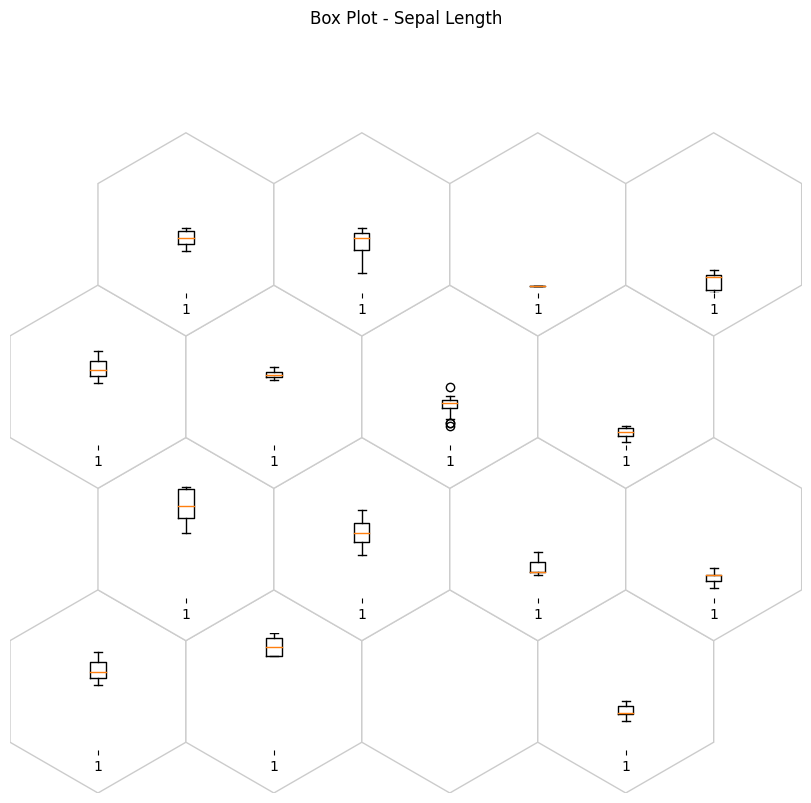

In [93]:
fig, ax, h_axes = som.plot('box', data_dict, ind=0)
plt.suptitle("Box Plot - Sepal Length")
plt.show()

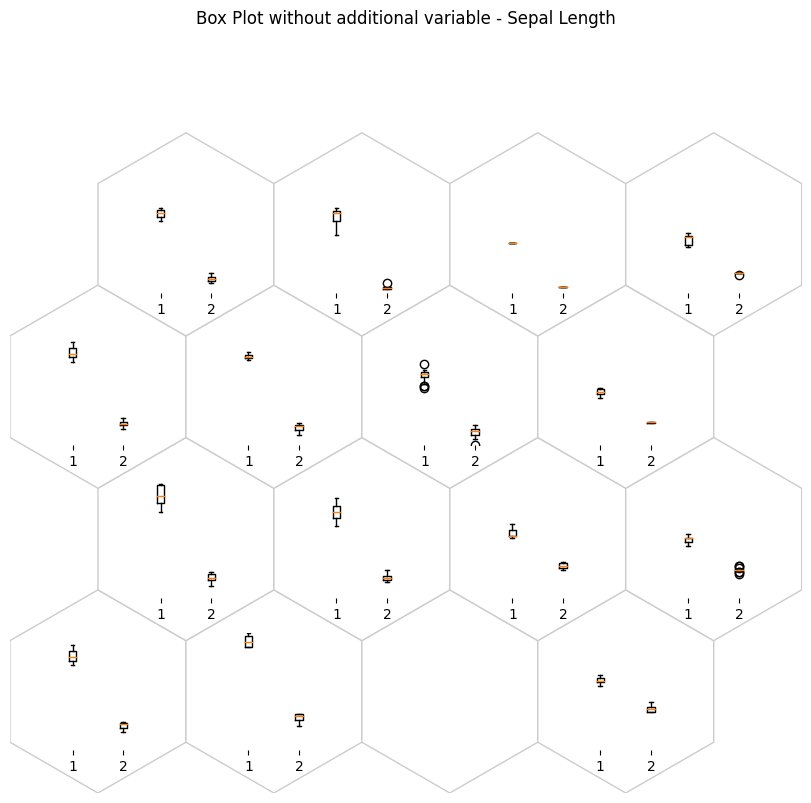

In [96]:
fig, ax, h_axes = som.plot('box', data_dict, ind= [0, 1])
plt.suptitle("Box Plot without additional variable - Sepal Length")
plt.show()

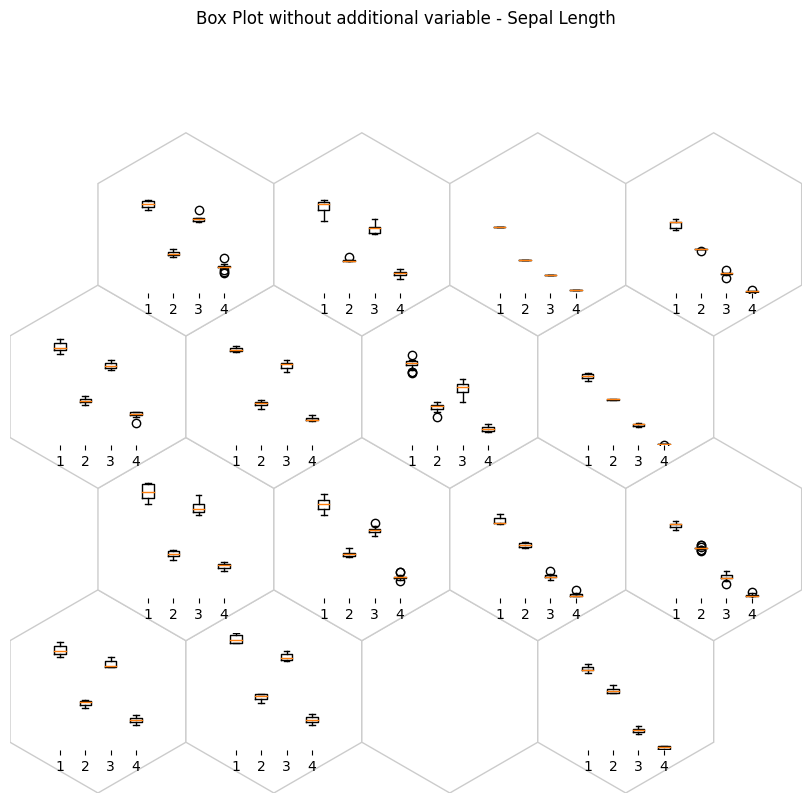

In [97]:
fig, ax, h_axes = som.plot('box', data_dict)
plt.suptitle("Box Plot without additional variable - Sepal Length")
plt.show()

#### Violin Plot

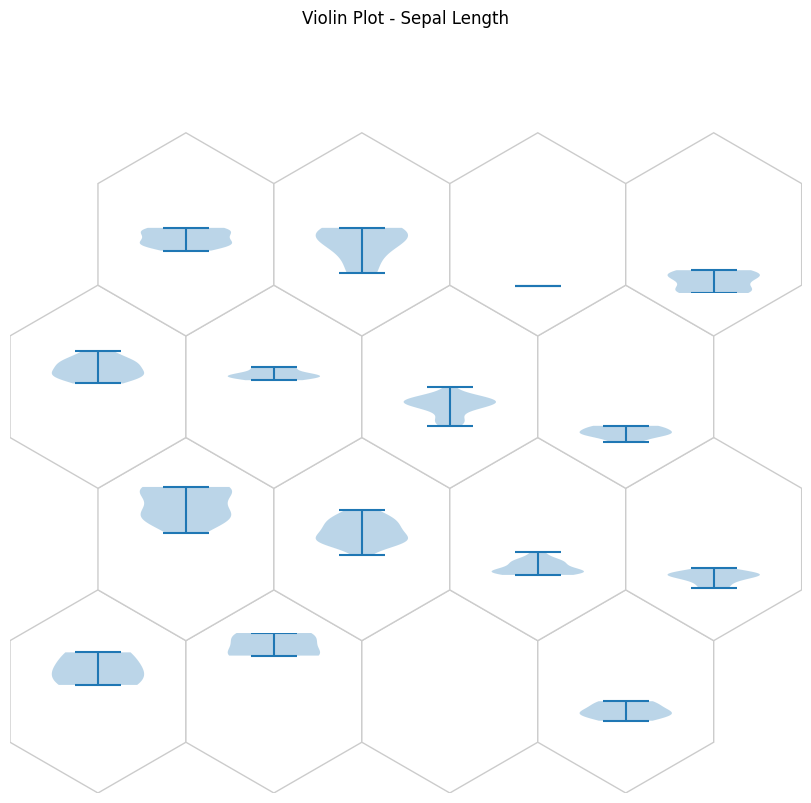

In [98]:
fig, ax, h_axes = som.plot('violin', data_dict, ind=0)
plt.suptitle("Violin Plot - Sepal Length")
plt.show()

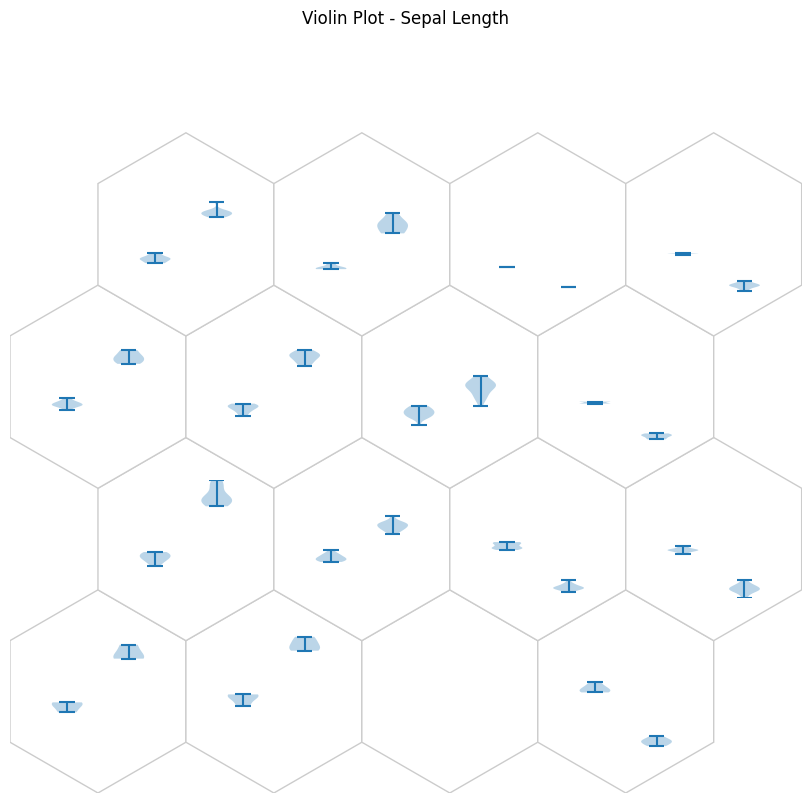

In [99]:
fig, ax, h_axes = som.plot('violin', data_dict, ind= [1, 2])
plt.suptitle("Violin Plot - Sepal Length")
plt.show()

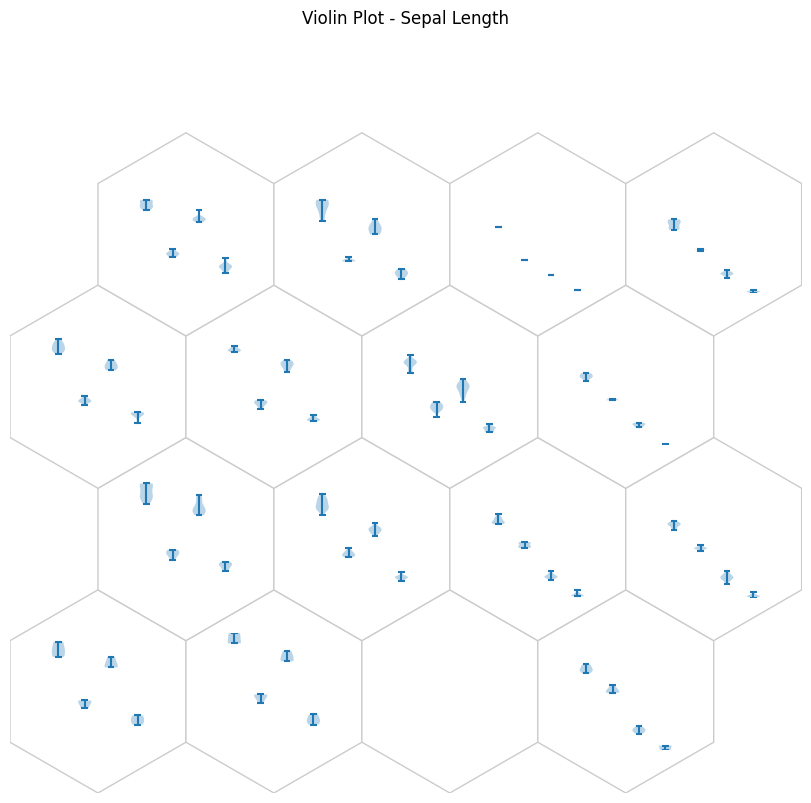

In [100]:
fig, ax, h_axes = som.plot('violin', data_dict)
plt.suptitle("Violin Plot - Sepal Length")
plt.show()

#### Scatter Plot

/usr/local/lib/python3.10/dist-packages/NNSOM/plots.py:1204: RankWarning: Polyfit may be poorly conditioned
  m, p = np.polyfit(x[neuron], y[neuron], 1)


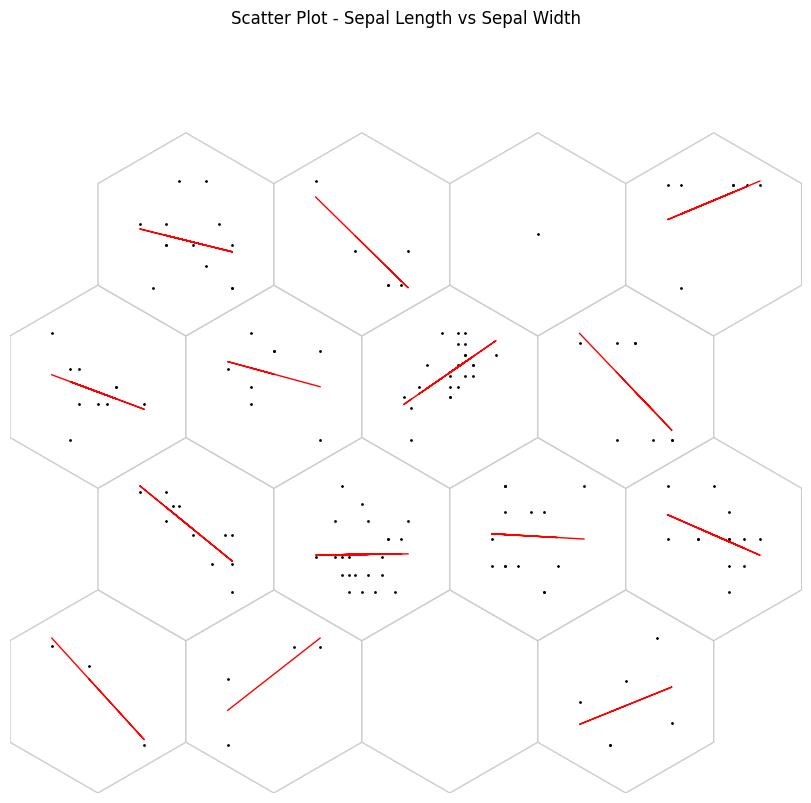

In [101]:
fig, ax, h_axes = som.plot('scatter', data_dict, ind=[0, 1])
plt.suptitle("Scatter Plot - Sepal Length vs Sepal Width")
plt.show()

/usr/local/lib/python3.10/dist-packages/NNSOM/plots.py:1204: RankWarning: Polyfit may be poorly conditioned
  m, p = np.polyfit(x[neuron], y[neuron], 1)


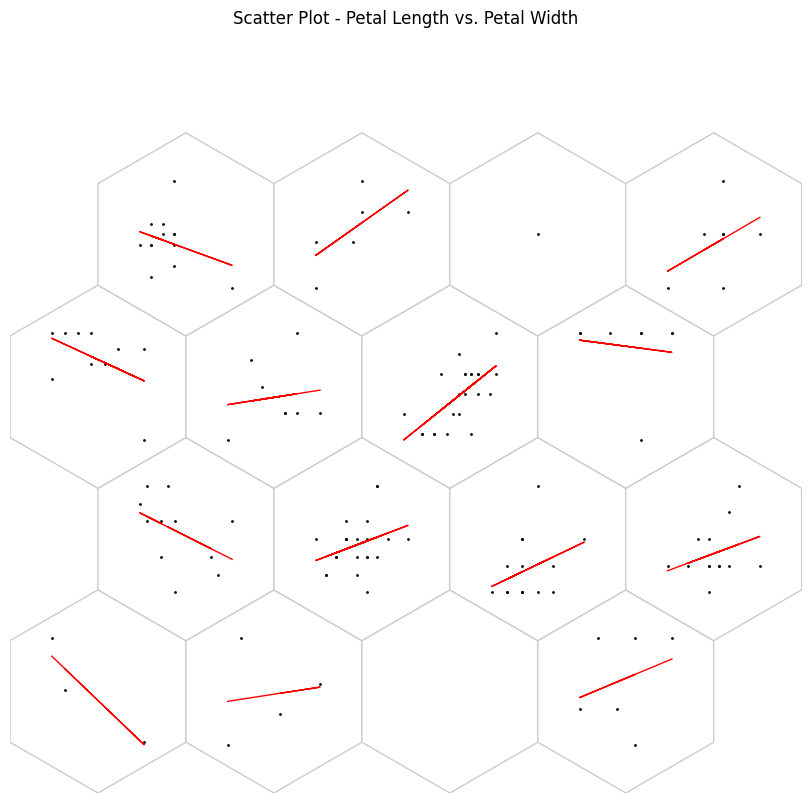

In [102]:
fig, ax, h_axes = som.plot('scatter', data_dict, ind=[2, 3])
plt.suptitle("Scatter Plot - Petal Length vs. Petal Width")
plt.show()

### Component Plane

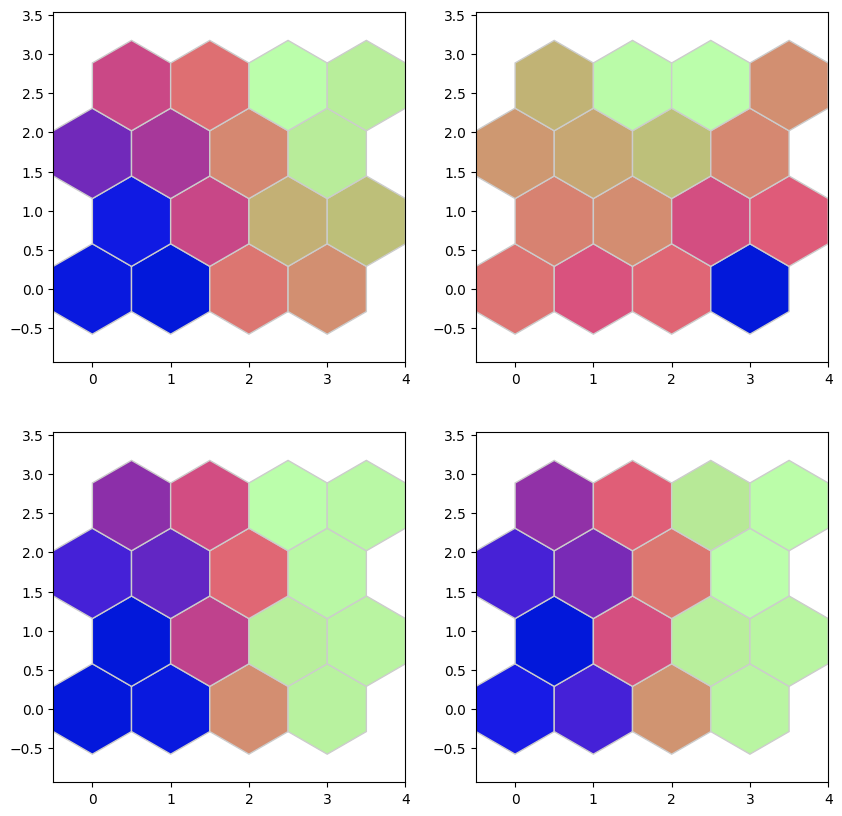

In [110]:
som.plot('component_planes', data_dict)

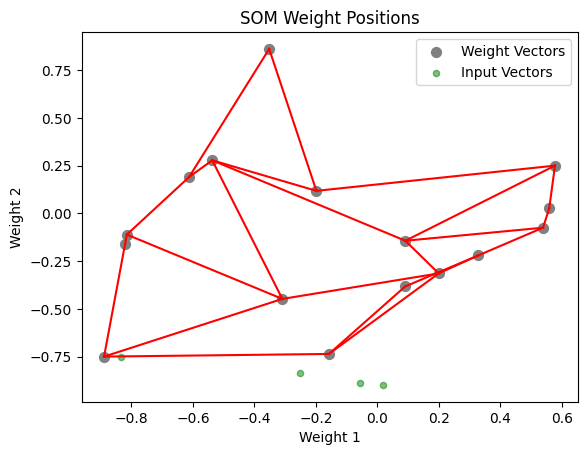

In [108]:
som.plot('component_positions', data_dict)